# 🎓 Student Loan Repayment

### Author: Aston Crawley

UK student loans allow tens of thousands of students every year access to higher education. Unlike a traditional loan, some plans of student loans are written off after a certain timeframe. Here we investigate the pros and cons of making additional student loan repayments on top of the mandatory contributions for each of the existing student loan plans.

In [ ]:
# Import libraries
import math
import numpy as np
import matplotlib.pyplot as plt

## Plan 2 Student Loans

These are the most commonplace student loans out there, each year of a degree costs £9,000, and you start playing back your loan on the April after you graduate

In [12]:
# Setup some standard parameters based on the average university degree

degree_len = 3
cost_per_year = 9000

write_off_period = 30
study_interest = 1.073 # The interest rate applied to the student loan while you are studying
low_interest_rate = 1.043
high_interest_rate = 1.073

repayment_thresh = 28470 # Annual Plan 2 student loan repayment threshold 2025/26
repayment_multiplier = 0.09 # Percentage of which you must repay over the repayment threshold

Let us calculate the total student loan for a standard 3 year degree where no repayments are made

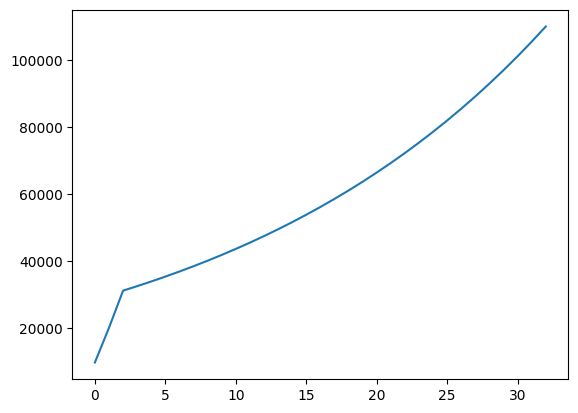

In [11]:
annual_loan_min = []
loan = 0

for i in range(write_off_period + degree_len):
    if i < degree_len: # While the student is studying
        loan = (loan + cost_per_year) * study_interest
        annual_loan_min.append(loan)
    else: # While the student is not studying
        loan = loan * low_interest_rate
        annual_loan_min.append(loan)

plt.plot(annual_loan_min)
plt.show()

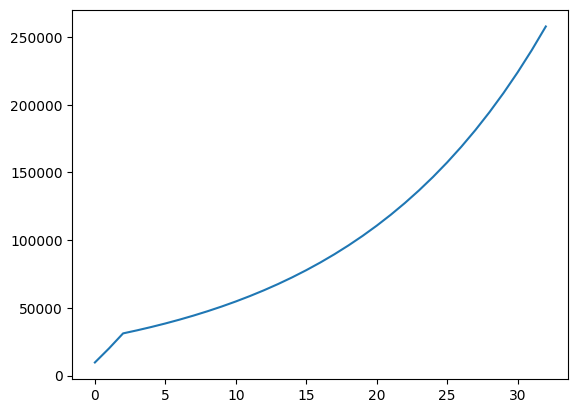

In [13]:
annual_loan_max = []
loan = 0

for i in range(write_off_period + degree_len):
    if i < degree_len: # While the student is studying
        loan = (loan + cost_per_year) * study_interest
        annual_loan_max.append(loan)
    else: # While the student is not studying
        loan = loan * high_interest_rate
        annual_loan_max.append(loan)

plt.plot(annual_loan_max)
plt.show()

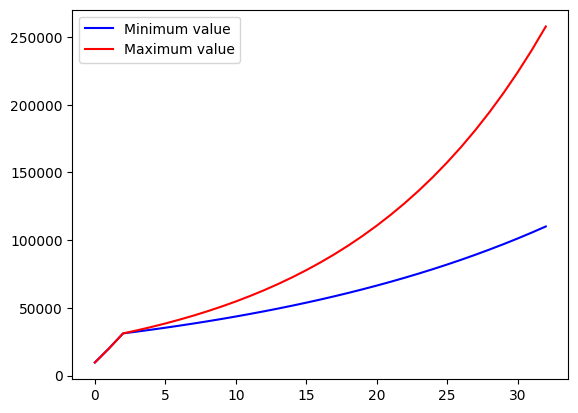

In [14]:
plt.plot(annual_loan_min, label='Minimum value', color='blue')
plt.plot(annual_loan_max, label='Maximum value', color='red')
plt.legend()
plt.show()


In [ ]:
print(f"Total value of the minimum student loan after 30 years is: £{annual_loan_min[-1]}")
print(f"Total value of the maximum student loan after 30 years is: £{annual_loan_max[-1]}")

Total value of the minimum student load after 30 years is: £110105.9614597771
Total value of the maximum student load after 30 years is: £257794.2579610263


From this we can see that the approximate total repayments for a student loan 30 years after the completion of their degree is over £100,000 

How Repayments Work:
- You only repay when your pre-tax income exceeds the threshold. 
- You repay 9% of your income above the threshold. 
- Repayments are typically deducted from your salary through Pay As You Earn (PAYE). 

In [10]:
def calculate_interest(rpi, income, low_thresh=28470.00, high_thresh=51245.00):
    """function that calculates the student loan interest rate based on the retail price index and income

    Args:
        rpi (float): retail price index
        income (float): annual income

    Returns:
        float: interest rate to be applied
    """
    
    if income < low_thresh: 
        interest_rate = rpi
    elif income > high_thresh:
        interest_rate = rpi + 3
    else:
        interest_rate = rpi + 3 * ((income - low_thresh) / (high_thresh - low_thresh))
    
    return interest_rate

In [ ]:
def calculate_min_repayment(salary, annual_thresh, charge=0.09):
    """function that calculates the minimum monthly repayment of the student loan

    Args:
        salary (float): annual salary
        annual_thresh (float): repayment threshold
        charge (float): repayment percentage

    Returns:
        int: minimum monthly repayment amount
    """
    
    monthly_thresh = annual_thresh/12
    
    monthly_repayment = ((salary/12)-monthly_thresh)*charge
    
    if monthly_repayment < 0:
        monthly_repayment = 0
            
    return math.floor(monthly_repayment)